In [192]:
!unzip "Week07_assignment - dataset fraud detection"

unzip:  cannot find or open Week07_assignment - dataset fraud detection, Week07_assignment - dataset fraud detection.zip or Week07_assignment - dataset fraud detection.ZIP.


/home/stanley/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

In [2]:

# def readCombineCsv(directory):
#     train = []
#     test = []
#     train_label = []
#     test_label = []
#     for filename in sorted(os.listdir(directory)):
#         data_type, data_func = filename.split('.')[3], filename.split('.')[4]
#         if data_func == 'Inputs':
#             data = pd.read_csv(directory + '/' + filename)
#             train.append(data) if data_type == 'Train' else test.append(data)
#         else:
#             data = pd.read_csv(directory + '/' + filename, names=['label'])
#             train_label.append(data) if data_type == 'Train' else test_label.append(data)
#     train = pd.concat(train, axis=0, ignore_index=True)
#     train_label = pd.concat(train_label, axis=0, ignore_index=True)
#     test = pd.concat(test, axis=0, ignore_index=True)
#     test_label = pd.concat(test_label, axis=0, ignore_index=True)
#     return train, test, train_label, test_label

# load functions
def readFullDataset(directory):
    X = []
    y = []
    target = sorted(os.listdir(directory))[0:4]
    for filename in target:
        data_type, data_func = filename.split('.')[3], filename.split('.')[4]
        if data_func == 'Inputs':
            data = pd.read_csv(directory + '/' + filename)
            X.append(data)
        else:
            data = pd.read_csv(directory + '/' + filename, names=['label'])
            y.append(data)
    
    # convert to dataframe
    X = pd.concat(X, axis=0, ignore_index=True)
    y = pd.concat(y, axis=0, ignore_index=True)
    return X,y

In [3]:
# load data
X, y = readFullDataset('fraud_detection')

display(X.head())
display(y.head())

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5
0,25.90,0,FL,331,3,BELLSOUTH.NET,1,0,1,25.90,3878,8,0,0,0,0,1,0,1
1,38.85,0,TX,750,2,COMCAST.NET,1,0,0,38.85,-6330,21,1,0,0,1,1,0,1
2,38.85,1,VA,222,2,HOTMAIL.COM,0,1,0,38.85,5183,19,1,0,0,0,0,0,1
3,24.95,1,CA,946,0,GMAIL.COM,0,1,0,24.95,3822,16,0,0,0,0,0,0,1
4,20.72,1,CO,805,3,LEVEL3.COM,0,1,1,20.72,3536,8,1,0,0,1,1,0,1


,label
0,0
1,0
2,0
3,0
4,0


In [4]:
display(X.shape)
display(y.shape)

(94682, 19)

(94682, 1)

In [5]:
frauds_idx = y.loc[y["label"] != 0]
y.value_counts()

label
0        92588
1         2094
dtype: int64

In [6]:
# Exploratory Data Analysis
X.describe()

,amount,hour1,zip1,field1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5
count,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000
mean,25.635312,13.864726,543.243742,2.419203,0.425561,13.875858,0.546989,25.626179,714.512653,13.984115,1.375689,0.113306,0.018367,0.541127,0.401185,0.019888,6.176676
std,14.190485,5.263233,315.373801,1.003760,0.494430,5.258338,0.497790,14.198761,3919.325076,6.516851,2.423941,0.316968,0.134274,0.498308,0.490141,0.139615,102.977443
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-32265.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.950000,10.000000,282.000000,2.000000,0.000000,11.000000,0.000000,12.950000,-1551.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,25.900000,14.000000,530.000000,3.000000,0.000000,14.000000,1.000000,25.900000,1455.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,38.850000,18.000000,891.000000,3.000000,1.000000,18.000000,1.000000,38.850000,3598.000000,19.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,95.400000,23.000000,999.000000,4.000000,1.000000,23.000000,1.000000,95.400000,8193.000000,46.000000,26.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3278.000000


In [7]:
# !pip3 install pandas_profiling

# import pandas_profiling 

# pandas_profiling.ProfileReport(X_train)

0    92588
1     2094
Name: label, dtype: int64


<AxesSubplot:>

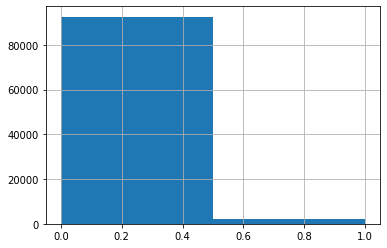

In [8]:
print(y.label.value_counts())
y.label.hist(bins=2)

In [9]:
# Merge data & label for preprocessing
merged_data = X.join(pd.get_dummies(y))
print('Raw data train length: ', len(merged_data))

Raw data train length:  94682


In [10]:
merged_data.head()

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,label
0,25.90,0,FL,331,3,BELLSOUTH.NET,1,0,1,25.90,3878,8,0,0,0,0,1,0,1,0
1,38.85,0,TX,750,2,COMCAST.NET,1,0,0,38.85,-6330,21,1,0,0,1,1,0,1,0
2,38.85,1,VA,222,2,HOTMAIL.COM,0,1,0,38.85,5183,19,1,0,0,0,0,0,1,0
3,24.95,1,CA,946,0,GMAIL.COM,0,1,0,24.95,3822,16,0,0,0,0,0,0,1,0
4,20.72,1,CO,805,3,LEVEL3.COM,0,1,1,20.72,3536,8,1,0,0,1,1,0,1,0


In [11]:
merged_data.dtypes

amount        float64
hour1           int64
state1         object
zip1            int64
field1          int64
domain1        object
field2          int64
hour2           int64
flag1           int64
total         float64
field3          int64
field4          int64
field5          int64
indicator1      int64
indicator2      int64
flag2           int64
flag3           int64
flag4           int64
flag5           int64
label           int64
dtype: object

# PRE-PROCESSING

In [203]:
# drop duplicate rows

merged_data = merged_data.drop_duplicates(keep="first", inplace=False)
print('-Duplicates removal- data train length: ', len(merged_data))
merged_data['label'].value_counts()

/home/stanley/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-Duplicates removal- data train length:  87499


0    85586
1     1913
Name: label, dtype: int64

In [204]:
# drop rows with NaN values
merged_data = merged_data.dropna().copy()

print('Data train length without NaN: ', len(merged_data))
merged_data['label'].value_counts()

Data train length without NaN:  87498


/home/stanley/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    85585
1     1913
Name: label, dtype: int64

In [205]:
# Label Encoding non-numerical feature
le = LabelEncoder()
merged_data['state1'] = le.fit_transform(merged_data['state1'])
merged_data['domain1'] = le.fit_transform(merged_data['domain1'])
 
display(merged_data.head())

/home/stanley/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,label
0,25.90,0,11,331,3,494,1,0,1,25.90,3878,8,0,0,0,0,1,0,1,0
1,38.85,0,45,750,2,1102,1,0,0,38.85,-6330,21,1,0,0,1,1,0,1,0
2,38.85,1,47,222,2,3021,0,1,0,38.85,5183,19,1,0,0,0,0,0,1,0
3,24.95,1,6,946,0,2620,0,1,0,24.95,3822,16,0,0,0,0,0,0,1,0
4,20.72,1,7,805,3,4319,0,1,1,20.72,3536,8,1,0,0,1,1,0,1,0


In [206]:
# Remove outliers with z-score
# from scipy import stats
# data_train = data_train[(np.abs(stats.zscore(data_train)) < 3).all(axis=1)]
# display(data_train.head())
# print('Data train length after outlier removals with z-score: ', len(data_train))
# data_train['label'].value_counts()

/home/stanley/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [207]:
display(merged_data['indicator2'].value_counts())
merged_data['label'].value_counts()

/home/stanley/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    85932
1     1566
Name: indicator2, dtype: int64

0    85585
1     1913
Name: label, dtype: int64

In [208]:
# data_train correlation
corr = merged_data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/home/stanley/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,label
amount,1.00,0.01,-0.00,0.01,-0.07,-0.00,0.00,0.01,-0.20,1.00,-0.07,0.06,-0.05,-0.02,-0.01,0.10,0.02,-0.03,-0.08,-0.02
hour1,0.01,1.00,-0.01,0.06,0.00,-0.01,0.01,0.99,-0.04,0.01,0.01,0.01,-0.01,0.00,-0.01,-0.01,-0.01,-0.01,-0.02,-0.16
state1,-0.00,-0.01,1.00,-0.30,-0.01,0.01,0.00,-0.01,-0.03,-0.00,0.03,0.02,0.00,-0.02,0.00,0.00,-0.00,-0.00,0.02,-0.02
zip1,0.01,0.06,-0.30,1.00,0.05,0.05,-0.01,0.06,0.02,0.01,-0.04,-0.01,-0.02,0.06,0.01,-0.02,-0.02,-0.00,0.00,0.02
field1,-0.07,0.00,-0.01,0.05,1.00,0.01,0.04,0.00,-0.02,-0.08,0.09,-0.01,0.02,0.03,-0.00,0.01,0.04,0.04,0.07,0.09
domain1,-0.00,-0.01,0.01,0.05,0.01,1.00,-0.01,-0.01,-0.02,-0.00,0.11,0.07,-0.02,0.05,0.01,-0.02,-0.02,-0.02,-0.04,-0.00
field2,0.00,0.01,0.00,-0.01,0.04,-0.01,1.00,0.01,-0.08,0.00,0.03,0.07,-0.02,0.01,0.00,0.01,-0.00,-0.02,0.01,-0.00
hour2,0.01,0.99,-0.01,0.06,0.00,-0.01,0.01,1.00,-0.04,0.01,0.01,0.01,-0.01,0.00,-0.01,-0.01,-0.01,-0.01,-0.02,-0.16
flag1,-0.20,-0.04,-0.03,0.02,-0.02,-0.02,-0.08,-0.04,1.00,-0.20,0.05,-0.46,0.18,0.01,0.03,-0.01,-0.01,0.09,-0.03,-0.02
total,1.00,0.01,-0.00,0.01,-0.08,-0.00,0.00,0.01,-0.20,1.00,-0.07,0.06,-0.05,-0.02,-0.01,0.10,0.02,-0.03,-0.08,-0.02


## Remove Highly correlated features!

In [209]:
# dummy array to hold valid columns
valid_columns = np.full((corr.shape[0],), True, dtype=bool)

for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8:
            if valid_columns[j]:
                valid_columns[j] = False # mark column as invalid
                
selected_columns = merged_data.columns[valid_columns]
selected_data = merged_data[selected_columns]

/home/stanley/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [210]:
selected_data.head()

/home/stanley/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,amount,hour1,state1,zip1,field1,domain1,field2,flag1,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,label
0,25.90,0,11,331,3,494,1,1,3878,8,0,0,0,0,1,0,1,0
1,38.85,0,45,750,2,1102,1,0,-6330,21,1,0,0,1,1,0,1,0
2,38.85,1,47,222,2,3021,0,0,5183,19,1,0,0,0,0,0,1,0
3,24.95,1,6,946,0,2620,0,0,3822,16,0,0,0,0,0,0,1,0
4,20.72,1,7,805,3,4319,0,1,3536,8,1,0,0,1,1,0,1,0


In [211]:
# value scaling
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_data = []
for key in selected_data.iteritems() :
    if (len(selected_data[key[0]].unique()) > 6) :
        num_data.append(key[0])
      
scaled_data = selected_data.copy()
scaled_data[num_data] = minmax_scale(selected_data[num_data])
# X_test[num_data] = minmax_scale(X_test[num_data])
scaled_data.describe()

/home/stanley/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,amount,hour1,state1,zip1,field1,domain1,field2,flag1,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,label
count,87498.000000,87498.000000,87498.000000,87498.000000,87498.000000,87498.000000,87498.000000,87498.000000,87498.000000,87498.000000,87498.000000,87498.000000,87498.000000,87498.000000,87498.000000,87498.000000,87498.000000,87498.000000
mean,0.279087,0.604491,0.437402,0.541866,2.411472,0.412338,0.430364,0.527429,0.814401,0.202204,0.052141,0.112688,0.017898,0.542675,0.399541,0.018720,0.001788,0.021863
std,0.148367,0.228287,0.296730,0.316451,1.005276,0.338950,0.495130,0.499250,0.097376,0.163198,0.092155,0.316213,0.132580,0.498178,0.489807,0.135537,0.030159,0.146238
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.135744,0.478261,0.115385,0.280843,2.000000,0.097981,0.000000,0.000000,0.757205,0.075000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000305,0.000000
50%,0.271488,0.608696,0.384615,0.522568,3.000000,0.308014,0.000000,1.000000,0.833086,0.150000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000305,0.000000
75%,0.407233,0.782609,0.692308,0.891675,3.000000,0.728691,1.000000,1.000000,0.886425,0.350000,0.076923,0.000000,0.000000,1.000000,1.000000,0.000000,0.000305,0.000000
max,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [212]:
scaled_data.head()

/home/stanley/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,amount,hour1,state1,zip1,field1,domain1,field2,flag1,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,label
0,0.271488,0.000000,0.211538,0.329990,3,0.050367,1,1,0.893346,0.050,0.000000,0,0,0,1,0,0.000305,0
1,0.407233,0.000000,0.865385,0.750251,2,0.112357,1,0,0.641035,0.375,0.038462,0,0,1,1,0,0.000305,0
2,0.407233,0.043478,0.903846,0.220662,2,0.308014,0,0,0.925602,0.325,0.038462,0,0,0,0,0,0.000305,0
3,0.261530,0.043478,0.115385,0.946841,0,0.267129,0,0,0.891962,0.250,0.000000,0,0,0,0,0,0.000305,0
4,0.217191,0.043478,0.134615,0.805416,3,0.440355,0,1,0.884893,0.050,0.038462,0,0,1,1,0,0.000305,0


In [213]:
# Split data & label after preprocessing
X_ = scaled_data.iloc[:,:-1]
y_ = pd.DataFrame()
y_['label'] = scaled_data.iloc[:,-1]

/home/stanley/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [214]:
display(X_.head())
display(y_.head())

/home/stanley/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,amount,hour1,state1,zip1,field1,domain1,field2,flag1,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5
0,0.271488,0.000000,0.211538,0.329990,3,0.050367,1,1,0.893346,0.050,0.000000,0,0,0,1,0,0.000305
1,0.407233,0.000000,0.865385,0.750251,2,0.112357,1,0,0.641035,0.375,0.038462,0,0,1,1,0,0.000305
2,0.407233,0.043478,0.903846,0.220662,2,0.308014,0,0,0.925602,0.325,0.038462,0,0,0,0,0,0.000305
3,0.261530,0.043478,0.115385,0.946841,0,0.267129,0,0,0.891962,0.250,0.000000,0,0,0,0,0,0.000305
4,0.217191,0.043478,0.134615,0.805416,3,0.440355,0,1,0.884893,0.050,0.038462,0,0,1,1,0,0.000305


,label
0,0
1,0
2,0
3,0
4,0


In [224]:
# Undersample majority class in train dataset
from imblearn.under_sampling import NearMiss

nr = NearMiss()
X_, y_ = nr.fit_sample(X_, y_)
display(X_.head())
display(y_.head())
display(y_.shape)
display(np.bincount(y_['label']))
display(y_.value_counts())

/home/stanley/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,amount,hour1,state1,zip1,field1,domain1,field2,flag1,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5
0,0.000000,0.478261,0.846154,0.378134,4,0.099715,0,0,0.736591,0.100,0.153846,0,0,1,1,0,0.488103
1,0.135744,0.086957,0.115385,0.921765,4,0.308014,1,0,0.934006,0.075,0.076923,1,0,1,0,0,0.000305
2,0.000000,0.521739,0.846154,0.378134,4,0.099715,0,0,0.757452,0.050,0.115385,0,0,1,1,0,0.488103
3,0.000000,0.260870,0.480769,0.549649,4,0.112357,0,1,0.733971,0.075,0.000000,0,0,0,0,0,0.000610
4,0.000000,0.478261,0.846154,0.378134,4,0.099715,0,0,0.776880,0.125,0.153846,0,0,1,1,0,0.488103


,label
0,0
1,0
2,0
3,0
4,0


(3826, 1)

array([1913, 1913])

label
1        1913
0        1913
dtype: int64

In [216]:
# Cross Validation with kfold
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True)

datasets = []
X__ = np.array(X_)
y__ = np.array(y_)

for train_index, test_index in kf.split(X__):
    dataset = {}
    dataset['X_train'], dataset['X_test'] = X__[train_index], X__[test_index]
    dataset['y_train'], dataset['y_test'] = y__[train_index], y__[test_index]
    datasets.append(dataset)

/home/stanley/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [217]:
from sklearn.model_selection import StratifiedShuffleSplit

def splitData(data, label, train_sz, test_sz, seed=0):
    sss = StratifiedShuffleSplit(n_splits=1, train_size=train_sz, test_size=test_sz, random_state=seed)
    indices = sss.split(data, label)
    train_indices, test_indices = next(indices)
    
    train_splitted_data, train_splitted_label = data[train_indices], label[train_indices]
    test_splitted_data, test_splitted_label = data[test_indices], label[test_indices]
                                                                        
    return (train_splitted_data, train_splitted_label, test_splitted_data, test_splitted_label)


train_data, train_label, val_data, val_label= splitData(X__, y__, 0.9, 0.1)

/home/stanley/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [225]:
# put your code here for M02.d
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# use Grid search to find the best parameters for Logistic Regression:
param_grid_lr = {
'solver': ['newton-cg', 'lbfgs', 'liblinear','sag','saga'],
'class_weight':[None, 'balanced'],
'C':np.logspace(-4, 4, 5),
'max_iter':[100, 250, 500]
}

gs_cv = GridSearchCV(LogisticRegression(random_state=0), param_grid_lr).fit(X__, y__.ravel())
print("Best Score: ", gs_cv.best_score_)
print("Best Params: ", gs_cv.best_params_)

/home/stanley/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector 

/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best Score:  0.7477929657502688
Best Params:  {'C': 1.0, 'class_weight': 'balanced', 'max_iter': 100, 'solver': 'newton-cg'}


/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/stanley/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [ ]:
# use Grid search to find the best parameters for Logistic Regression:

param_grid = {'C': [0.1,1, 10, 100], 'break_ties': (True,False),'gamma': [1,0.1,0.01,0.001, 
                'scale'],'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

gs_cv = GridSearchCV(svm.SVC(), param_grid).fit(X__, y__.ravel())
print("Best Score: ", gs_cv.best_score_)
print("Best Params: ", gs_cv.best_params_)

/home/stanley/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [226]:
# Train Logistic Regression with best parameters:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

f1score = 0
accs = 0
recalls = 0
rocaucs = 0

for dataset in datasets:
    clf = LogisticRegression(C= 1.0, class_weight= 'balanced', max_iter= 100, 
                             solver= 'newton-cg').fit(dataset['X_train'], dataset['y_train'].ravel())
    predictions = clf.predict(dataset['X_test'])

    fscore = f1_score(dataset['y_test'], predictions, average='macro', zero_division=0)
    f1score += fscore
    acc = accuracy_score(dataset['y_test'], predictions)
    accs += acc
    recall = recall_score(dataset['y_test'], predictions, average='macro', zero_division=1)
    recalls += recall
    rocauc = roc_auc_score(dataset['y_test'], predictions)
    rocaucs += rocauc
    print(confusion_matrix(dataset['y_test'], predictions))
    print('Accuracy: ', acc)
    print('F1-Score: ', fscore)
    print('Recall: ', recall)
    print('ROC-AUC score:', rocauc)
    
print()    
print("avg f1-score:", f1score/10)
print("avg acc-score:", accs/10)
print("avg recall-score:", recalls/10)
print("avg roc-auc-score", rocaucs/10)

/home/stanley/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[152  32]
 [ 56 143]]
Accuracy:  0.7702349869451697
F1-Score:  0.7701080432172869
Recall:  0.7723399606729299
ROC-AUC score: 0.77233996067293
[[153  39]
 [ 56 135]]
Accuracy:  0.7519582245430809
F1-Score:  0.7514091483619718
Recall:  0.7518406413612566
ROC-AUC score: 0.7518406413612566
[[153  43]
 [ 54 133]]
Accuracy:  0.7467362924281984
F1-Score:  0.7460437900320598
Recall:  0.7459210957110116
ROC-AUC score: 0.7459210957110116
[[145  47]
 [ 53 138]]
Accuracy:  0.7389033942558747
F1-Score:  0.7388161483906164
Recall:  0.7388607111692844
ROC-AUC score: 0.7388607111692844
[[162  33]
 [ 57 131]]
Accuracy:  0.7650130548302873
F1-Score:  0.7634634387351777
Recall:  0.7637888707037643
ROC-AUC score: 0.7637888707037642
[[147  35]
 [ 56 145]]
Accuracy:  0.762402088772846
F1-Score:  0.7623956096397041
Recall:  0.7645426712590893
ROC-AUC score: 0.7645426712590891
[[154  34]
 [ 59 135]]
Accuracy:  0.756544502617801
F1-Score:  0.7559407266956575
Recall:  0.7575126124150033
ROC-AUC score: 0.757512

In [220]:
from sklearn import svm
f1score = 0
accs = 0
recalls = 0
rocaucs = 0

for dataset in datasets:
    SVM = svm.SVC(C=10, break_ties=True, kernel='linear', degree=3, gamma=1)
    SVM.fit(dataset['X_train'],dataset['y_train'].ravel())
    predictions = SVM.predict(dataset['X_test'])
    
    fscore = f1_score(dataset['y_test'], predictions, average='macro', zero_division=0)
    f1score += fscore
    acc = accuracy_score(dataset['y_test'], predictions)
    accs += acc
    recall = recall_score(dataset['y_test'], predictions, average='macro', zero_division=1)
    recalls += recall
    rocauc = roc_auc_score(dataset['y_test'], predictions)
    rocaucs += rocauc
    print(confusion_matrix(dataset['y_test'], predictions))
#     print('Accuracy: ', acc)
#     print('F1-Score: ', fscore)
#     print('Recall: ', recall)
#     print('ROC-AUC score:', rocauc)
    
print()    
print("avg f1-score:", f1score/10)
print("avg acc-score:", accs/10)
print("avg recall-score:", recalls/10)
print("avg roc-auc-score", rocaucs/10)

/home/stanley/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[160  24]
 [ 67 132]]
[[159  33]
 [ 62 129]]
[[160  36]
 [ 64 123]]
[[156  36]
 [ 56 135]]
[[170  25]
 [ 63 125]]
[[155  27]
 [ 61 140]]
[[159  29]
 [ 64 130]]
[[157  35]
 [ 59 131]]
[[157  30]
 [ 57 138]]
[[179  26]
 [ 61 116]]

avg f1-score: 0.7589448402636014
avg acc-score: 0.7608498626167075
avg recall-score: 0.7606736401311277
avg roc-auc-score 0.7606736401311277


In [221]:
from sklearn.neighbors import KNeighborsClassifier
f1score = 0
accs = 0
recalls = 0
rocaucs = 0

for dataset in datasets:
    KNclassifier = KNeighborsClassifier(algorithm='auto', leaf_size=15, metric='minkowski', n_neighbors=10, p=3, 
                                        weights='distance')
    KNclassifier.fit(dataset['X_train'],dataset['y_train'].ravel())
    predictions = KNclassifier.predict(dataset['X_test'])
    
    fscore = f1_score(dataset['y_test'], predictions, average='macro', zero_division=0)
    f1score += fscore
    acc = accuracy_score(dataset['y_test'], predictions)
    accs += acc
    recall = recall_score(dataset['y_test'], predictions, average='macro', zero_division=1)
    recalls += recall
    rocauc = roc_auc_score(dataset['y_test'], predictions)
    rocaucs += rocauc
    
print()    
print("avg f1-score:", f1score/10)
print("avg acc-score:", accs/10)
print("avg recall-score:", recalls/10)
print("avg roc-auc-score", rocaucs/10)

/home/stanley/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



avg f1-score: 0.8201729308927274
avg acc-score: 0.82175713914672
avg recall-score: 0.8220939121991536
avg roc-auc-score 0.8220939121991536


In [222]:
from xgboost import XGBClassifier

f1score = 0
accs = 0
recalls = 0
rocaucs = 0

for dataset in datasets:
    xg = XGBClassifier(
        objective= 'binary:logistic',
        nthread=4,
        seed=42, gamma = 0.0, learning_rate= 0.1, max_depth = 2, n_estimators = 60)
    xg.fit(dataset['X_train'],dataset['y_train'].ravel())
    predictions = xg.predict(dataset['X_test'])
    
    fscore = f1_score(dataset['y_test'], predictions, average='macro', zero_division=0)
    f1score += fscore
    acc = accuracy_score(dataset['y_test'], predictions)
    accs += acc
    recall = recall_score(dataset['y_test'], predictions, average='macro', zero_division=1)
    recalls += recall
    rocauc = roc_auc_score(dataset['y_test'], predictions)
    rocaucs += rocauc
    
print()    
print("avg f1-score:", f1score/10)
print("avg acc-score:", accs/10)
print("avg recall-score:", recalls/10)
print("avg roc-auc-score", rocaucs/10)

/home/stanley/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



avg f1-score: 0.8126427853196159
avg acc-score: 0.8131156616953508
avg recall-score: 0.8133408644298544
avg roc-auc-score 0.8133408644298544


In [223]:
from sklearn.neural_network import MLPClassifier


f1score = 0
accs = 0
recalls = 0
rocaucs = 0

for dataset in datasets:
    classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=200,activation = 'identity',
                               solver='lbfgs',random_state=1)
    classifier.fit(dataset['X_train'],dataset['y_train'].ravel())
    predictions = classifier.predict(dataset['X_test'])
    
    fscore = f1_score(dataset['y_test'], predictions, average='macro', zero_division=0)
    f1score += fscore
    acc = accuracy_score(dataset['y_test'], predictions)
    accs += acc
    recall = recall_score(dataset['y_test'], predictions, average='macro', zero_division=1)
    recalls += recall
    rocauc = roc_auc_score(dataset['y_test'], predictions)
    rocaucs += rocauc
    
print()    
print("avg f1-score:", f1score/10)
print("avg acc-score:", accs/10)
print("avg recall-score:", recalls/10)
print("avg roc-auc-score", rocaucs/10)

/home/stanley/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



avg f1-score: 0.7647335133355342
avg acc-score: 0.765555069511845
avg recall-score: 0.7655088971721
avg roc-auc-score 0.7655088971721


In [ ]:
from sklearn.metrics import classification_report
predictions = clf.predict(X_test)

print(classification_report(y_true = y_test, y_pred = predictions))

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

print(confusion_matrix(y_test, predictions))
print('Accuracy: ', clf.score(X_test, y_test))
print('F1-Score: ', f1_score(y_test, predictions, average='macro'))

In [ ]:
from sklearn import svm
SVM = svm.SVC(C=10, break_ties=True, kernel='linear', degree=3, gamma=1)
SVM.fit(train_data,train_label)

In [ ]:
predictions_SVM = SVM.predict(X_test)
print(classification_report(y_true = y_test, y_pred = predictions_SVM))

In [ ]:
# Average score from 100 training

acc = []
f1score = []
falsePrediction = []

for i in range(100):
    clf.fit(train_data, train_label)

    y_pred = clf.predict(X_test)
    
    conf = confusion_matrix(y_test, y_pred)
    
    acc.append(clf.score(X_test, y_test))
    f1score.append(f1_score(y_test, y_pred, average='macro'))
    falsePrediction.append(conf[0,1])
    falsePrediction.append(conf[1,0])

    
print("Average accuracy : ", sum(acc) / len(acc))
print("F1-Score accuracy : ", sum(f1score) / len(f1score))
print("Total false prediction : ", sum(falsePrediction))
print("Average false prediction : ", sum(falsePrediction) / len(falsePrediction))

In [ ]:
# KNN Model Implementation
from sklearn.neighbors import KNeighborsClassifier

# Make and train the model
KNclassifier = KNeighborsClassifier(n_neighbors=5)
KNclassifier.fit(train_data, train_label)

In [ ]:
# Predict testing data with KNN Model
KNpredictTest = KNclassifier.predict(X_test)
print(classification_report(y_true = y_test, y_pred = KNpredictTest))
confusion_matrix(y_test, KNpredictTest)

# GRID SEARCH EXAMPLE: